In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [26]:
with open("StudyData.json", "r", encoding="utf-8") as file:
    data = json.load(file)

In [28]:
data.keys()

dict_keys(['studyCorrelation', 'courseFormat', 'midtermScores', 'approachGains', 'completionTimes'])

In [29]:
scores_A = data["midtermScores"]["class_A"]
scores_B = data["midtermScores"]["class_B"]

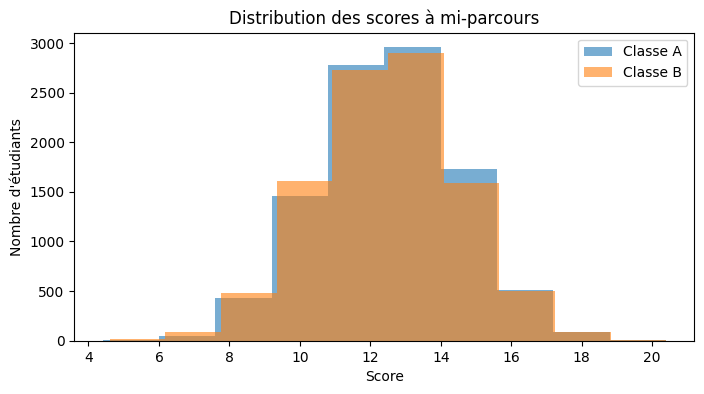

In [32]:
df_scores = pd.DataFrame({
    "score": scores_A + scores_B,
    "classe": ["A"] * len(scores_A) + ["B"] * len(scores_B)
})

# # Boxplot
# plt.figure(figsize=(6, 4))
# sns.boxplot(x="classe", y="score", data=df_scores)
# plt.title("Comparaison des scores à mi-parcours\nClasse A vs Classe B")
# plt.xlabel("Classe")
# plt.ylabel("Score à mi-parcours")
# plt.show()

# Histogramme
plt.figure(figsize=(8, 4))
plt.hist(scores_A, bins=10, alpha=0.6, label="Classe A")
plt.hist(scores_B, bins=10, alpha=0.6, label="Classe B")
plt.title("Distribution des scores à mi-parcours")
plt.xlabel("Score")
plt.ylabel("Nombre d'étudiants")
plt.legend()
plt.show()

In [33]:
mean_A = sum(scores_A) / len(scores_A)
mean_B = sum(scores_B) / len(scores_B)
print(f"Moyenne Classe A : {mean_A:.2f}")
print(f"Moyenne Classe B : {mean_B:.2f}")

Moyenne Classe A : 12.49
Moyenne Classe B : 12.50


« La moyenne de la classe A est de 12,49 contre 12,50 pour la classe B. Les distributions sont similaires, il n’y a donc pas de déséquilibre à corriger. »